# <span style="color:green">Project: Investigate Weather Trend</span>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## <span style="color:green">Introduction</span>

**Here in this analysis we are exploring and comparing Nagpur City(India) avg temperature data with global average temperature data**

Q1: What are the maximum and minimum temperature of Nagpur and global maximum and minimum? <br/>
Q2: What is the Nagpur average temprature trend and Global average temperature trend over the years?<br/>

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
df_city_nagpur = pd.read_csv('city_results.csv')
df_global = pd.read_csv('global_results.csv')

### Checking basic sanity of the data set below

In [158]:
df_city_nagpur.head(2)

,year,city,country,avg_temp
0,1796,Nagpur,India,25.43
1,1797,Nagpur,India,26.58


In [159]:
df_city_nagpur.shape

(218, 4)

In [160]:
df_global.head(2)

,year,avg_temp
0,1750,8.72
1,1751,7.98


In [161]:
df_global.shape

(266, 2)

<a id='wrangling'></a>
## <span style="color:green">Data Wrangling</span>

In [162]:
df_global.isna().any()

year        False
avg_temp    False
dtype: bool

In [163]:
#Below shows there is an NaN value in Nagpur City avg_temp data
df_city_nagpur.isna().any()

year        False
city        False
country     False
avg_temp     True
dtype: bool

In [164]:
df_city_nagpur[df_city_nagpur['avg_temp'].isna()]

,year,city,country,avg_temp
12,1808,Nagpur,India,NaN
13,1809,Nagpur,India,NaN
14,1810,Nagpur,India,NaN
15,1811,Nagpur,India,NaN
16,1812,Nagpur,India,NaN
67,1863,Nagpur,India,NaN
68,1864,Nagpur,India,NaN


In [165]:
# Will replace these NaN value with overall average of the city
df_city_nagpur_mean_temp = df_city_nagpur.avg_temp.mean()

In [166]:
#below shows the rows have been dropped from the data set
df_city_nagpur.avg_temp.fillna(df_city_nagpur_mean_temp, inplace=True)

In [167]:
# In order to compare both the data sets will start from 1796 and ending at 2013, and for this will have to strip out the global
# data before 1796 and after 2013
df_global = df_global[46:-2]
df_global.shape

(218, 2)

<a id='eda'></a>
## <span style="color:green">Exploratory Data Analysis</span>

**Q1: Comparing max and min temp of city Nagpur and Global average**

In [168]:
df_city_nagpur['avg_temp'].describe()

count    218.000000
mean      25.638768
std        0.615435
min       21.100000
25%       25.332500
50%       25.638768
75%       26.007500
max       27.140000
Name: avg_temp, dtype: float64

In [169]:
# Growth %age of Nagpur Average Temp
(df_city_nagpur.avg_temp.max() - df_city_nagpur.avg_temp.min())*100/df_city_nagpur.avg_temp.max()

22.254974207811344

In [170]:
df_global['avg_temp'].describe()

count    218.000000
mean       8.403532
std        0.548662
min        6.860000
25%        8.092500
50%        8.415000
75%        8.727500
max        9.730000
Name: avg_temp, dtype: float64

In [171]:
# Growth %age of Global Average Temp
(df_global.avg_temp.max() - df_global.avg_temp.min())*100/df_global.avg_temp.max()

29.49640287769784

Text(0.5,1,'Avg Temp over the years Nagpur and Global Line Chart ')

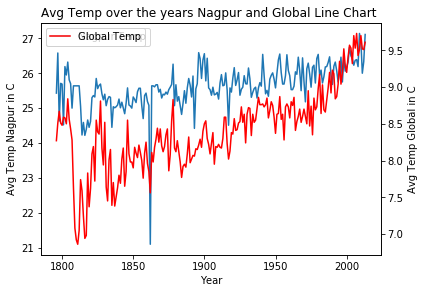

In [172]:
fig, ax1 = plt.subplots()
ax1.plot(df_city_nagpur['year'],df_city_nagpur['avg_temp'], label='Nagpur Temp')
plt.legend()
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Temp Nagpur in C')
ax2=ax1.twinx()
ax2.plot(df_global['year'],df_global['avg_temp'], color='r', label='Global Temp')
ax2.set_ylabel('Avg Temp Global in C')
plt.legend(loc='best')
fig.tight_layout()
ax1.set_title("Avg Temp over the years Nagpur and Global Line Chart ")

<a id='conclusions'></a>
## <span style="color:green">Conclusions</span>

**Q1: Nagpur average min and max temperature is much higher than global min and max temperature**<br/>
**Q2: Both Nagpur and Global Average temp have been increasing over the year**

**Other observations:<br/>
  Percentage growth of both Nagpur average temperature and global average temprature over the years is almost same. Nagpur growth is 22.25% and global is 22.30 % **<br/>
  
  **It seems that between 1800 to 1850 both Nagpur average temp and Global average temp has observed quite a few bigger dips**
  
